In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Fundamental concepts of model training

## Normal Equation
A direct method of calculating the best values of theta that is derived from the assumption of the derivative of cost function to be 0 at such values. Initially the values of the parameters will be computed using this equation and will then be compared with the second method.

## Gradient Descent
Will minimize the mean squared error function by subtracting from the parameter values the gradient along the direction of the minima.

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Text(0, 0.5, 'y')

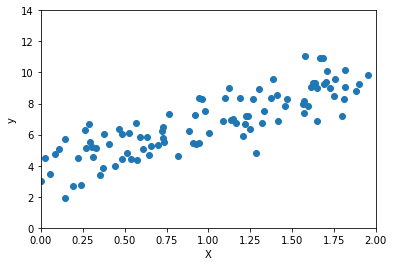

In [3]:
plt.scatter(X,y)
plt.xlim([0,2])
plt.ylim([0,14])
plt.margins(x=0,y=0)
plt.xlabel("X")
plt.ylabel("y")

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.7500055 ],
       [3.05247185]])

In [6]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [7]:
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.7500055],
       [9.8549492]])

Text(0, 0.5, 'y')

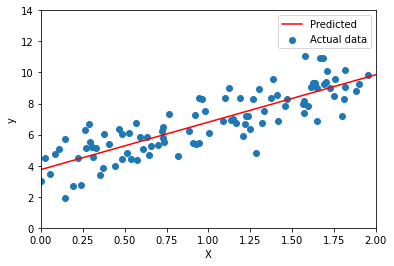

In [8]:
plt.scatter(X,y,label="Actual data")
plt.plot(X_new, y_predict, "r-", label = "Predicted")
plt.margins(x=0,y=0)
plt.legend()
plt.xlim([0,2])
plt.ylim([0,14])
plt.xlabel("X")
plt.ylabel("y")

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.7500055]), array([[3.05247185]]))

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [11]:
theta_best_svd

array([[3.7500055 ],
       [3.05247185]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[3.7500055 ],
       [3.05247185]])

# Gradient Descent Algorithms

They follow the principle that following the steepest gradient will get to the minima. To achieve this mathematically, the partial differential of the Mean Squared Error function is taken with respect to each parameter. There are different variations of this algorithms:
- **Batch Gradient Descent** - The algorithms is run on all the training instances for a given number of iterations. The gradient at each step is scaled with a learning rate and subtracted from the MSE till it becomes insignificant. The number of iterations along with the error rate and the minimum tolerance for MSE serve as the hyperparamter.
- **Stochastic gradient descent** -  

In [14]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
theta

array([[3.7500055 ],
       [3.05247185]])

In [77]:
def gradient_descent(eta=0.1):
    y_preds = []
    n_iterations = 1000
    m = 100
    theta = np.random.randn(2,1) # random initialization
    y_preds.append(X_b.dot(theta))
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if iteration < 10:
            y_preds.append(X_b.dot(theta))
        
    return y_preds

In [80]:
y_preds_1 = gradient_descent(0.1)
y_preds_2 = gradient_descent(0.02)
y_preds_5 = gradient_descent(0.5)

In [65]:
def plot_predictions(X,y,y_preds):
    plt.plot(X,y,"b.")
    plt.plot(X,y_preds[0],"r--")
    y_preds = y_preds[1:]
    for y_pred in y_preds:
        plt.plot(X,y_pred,"b-")
    plt.margins(x=0,y=0)
    plt.ylim([0,14])
    plt.xlim([0,2])
    plt.xlabel("x1")

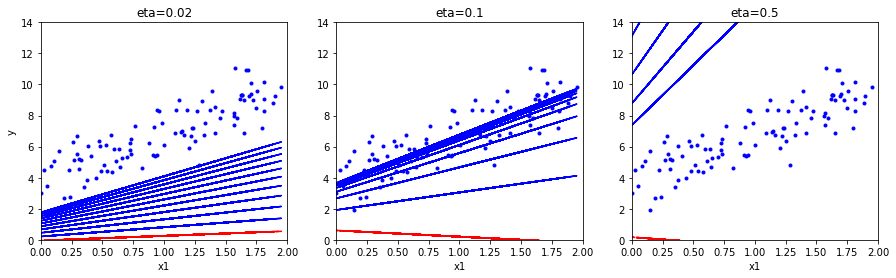

In [81]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title("eta=0.02")
plot_predictions(X,y,y_preds_2)
plt.ylabel("y")
plt.subplot(1,3,2)
plt.title("eta=0.1")
plot_predictions(X,y,y_preds_1)
plt.subplot(1,3,3)
plt.title("eta=0.5")
plot_predictions(X,y,y_preds_5)

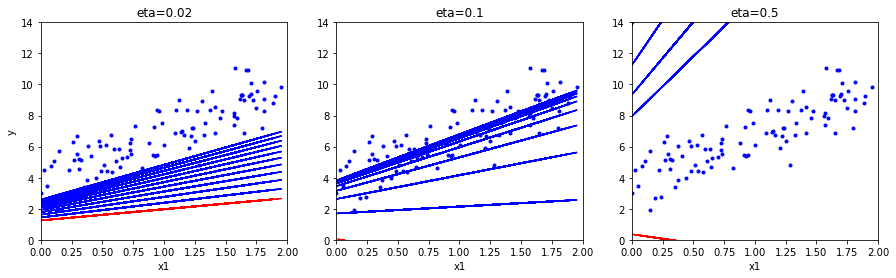